In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

In [27]:
empty_mass = .389 # kg
full_mass = 1.114 # kg
water_density = 997 # kg/m^3

d_n = 0.02 # m (neck diameter)
l_n = 0.085 # m (neck length)

In [28]:
def straight_line(x, A, B):
    return A*x + B

def volume(density, mass):
    return mass/density

def sound_speed(slope, d, l):
    c = 1.46212
    return (4 / d) * (np.pi * (l + c*d/2) * slope)**(1/2)

volume_full = volume(water_density, full_mass)

In [29]:
mass = [.389, .499, .566, .677, .800] # kg
frequency = [114.26, 121.58, 131.84, 147.95, 172.85] # Hz

x = [1 / (volume_full - volume(water_density, m)) for m in mass]
y = [f**2 for f in frequency]

In [30]:
popt, pcov = curve_fit(straight_line, x, y)
xx = np.linspace(x[0], x[-1], 1000)
yy = straight_line(xx, popt[0], popt[1])

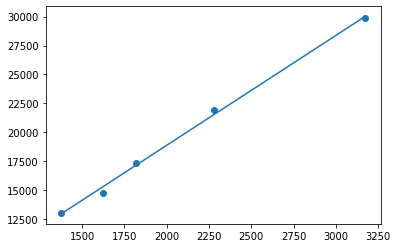

In [31]:
fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(xx, yy)

In [34]:
slope = popt[0]
sigma_slope = np.sqrt(np.diag(pcov))[0]
v = sound_speed(slope, d_n, l_n)
v

344.6662910694702

In [35]:
d_n_u = ufloat(d_n, 0.001)
l_n_u = ufloat(l_n, 0.001)
slope_u = ufloat(slope, sigma_slope)

v_u = sound_speed(slope_u, d_n_u, l_n_u)
v_u

344.6662910694702+/-16.808574214317893